In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import os 
import glob
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [2]:
# sorted 함수를 사용해 img_list에 있는 파일의 id 순서와 annot_list에 있는 파일의 id 순서가 같도록 해줍니다
img_list = sorted(glob.glob('data/Mask_data/images/*'))
annot_list = sorted(glob.glob('data/Mask_data/annotations//*'))

In [3]:
print(len(img_list))
print(len(annot_list))

853
853


In [4]:
# 각 폴더 파일 갯수 확인 

print(img_list[:10])
print(annot_list[:10])

['data/Mask_data/images/maksssksksss0.png', 'data/Mask_data/images/maksssksksss1.png', 'data/Mask_data/images/maksssksksss10.png', 'data/Mask_data/images/maksssksksss100.png', 'data/Mask_data/images/maksssksksss101.png', 'data/Mask_data/images/maksssksksss102.png', 'data/Mask_data/images/maksssksksss103.png', 'data/Mask_data/images/maksssksksss104.png', 'data/Mask_data/images/maksssksksss105.png', 'data/Mask_data/images/maksssksksss106.png']
['data/Mask_data/annotations/maksssksksss0.xml', 'data/Mask_data/annotations/maksssksksss1.xml', 'data/Mask_data/annotations/maksssksksss10.xml', 'data/Mask_data/annotations/maksssksksss100.xml', 'data/Mask_data/annotations/maksssksksss101.xml', 'data/Mask_data/annotations/maksssksksss102.xml', 'data/Mask_data/annotations/maksssksksss103.xml', 'data/Mask_data/annotations/maksssksksss104.xml', 'data/Mask_data/annotations/maksssksksss105.xml', 'data/Mask_data/annotations/maksssksksss106.xml']


이제 각각의 폴더에 들어있는 파일이 제대로 있는지 확인해보도록 합니다. [:10]는 처음부터 총 10개의 파일명을 출력합니다. 여기서 주의할 점은 출력되는 파일이 순서대로 나오는지 확인해야합니다. 순서대로 출력되지 않을 경우, 이미지 파일과 바운딩 박스 파일의 순서가 뒤얽혀 바운딩 박스가 제대로 표기되지 않는 문제가 발생합니다. 

In [5]:
# 바운딩 박스 시각화 

def generate_box(obj) :
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]


def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0


def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target
    
def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()
        

 generate_box 함수를 통해 xmin, ymin, xmax, ymax 값을 반환하도록 지정합니다. generate_label 함수는 마스크 착용 여부를 세단계로 나눠서 0, 1, 2 값을 반환합니다. with_mask의 경우 1을 mask_weared_incorrect의 경우 2를 나머지 경우의 수인 without_mask는 0을 반환합니다.

generate_target 함수는 generate_box와 generate_label를 각각 호출하여 반환된 값을 딕셔너리에 저장해 반환하는 함수입니다. html.parser를 이용해 annotations 파일에 있는 내용들을 불러와 타겟의 바운딩 박스와 라벨을 추출합니다. plot_image 함수는 이미지와 바운딩 박스를 함께 시각화 하는 함수입니다. 마스크 착용시 초록색, 마스크를 올바르게 착용 안했을 시 주황색, 마스크를 착용 안했을 시 빨간색 바운딩 박스를 그립니다.

In [8]:
img_list.index('data/Mask_data/images/maksssksksss307.png') 

232

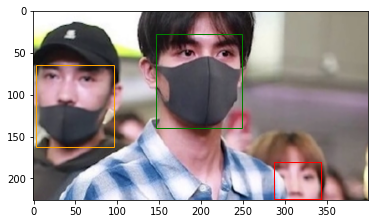

In [9]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)

plot_image 함수를 통해 이미지 위에 바운딩 박스를 시각화 합니다. generate_target 함수를 활용해 maksssksksss307.png 파일에 해당하는 바운딩 박스 정보를 bbox에 저장합니다. 그리고 plot_image 함수에 바운딩 박스 정보와 더불어 해당 이미지 파일 정보도 넘겨주어 시각화를 실시합니다. img_list[]와 annot_list[]안의 숫자는 maksssksksss307.png 파일의 위치를 뜻하므로 같은 숫자가 들어가 있습니다.

## Preprocessing 

augmentation에 사용되는 torchvision.transforms와 albumentations 모듈  

 torchvision.transforms는 파이토치에서 공식적으로 제공하는 모듈이며 albumentations는 OpenCV와 같은 오픈 소스 컴퓨터 비젼 라이브러리를 최적화 하였기에 다른 라이브러리보다 더 빠른 처리 속도 및 기타 기능을 제공하는 모듈이다. 
 
 언급된 두 모듈 모두 이미지 분류용 모델 구축을 위한 augmentation에는 사용 가능합니다. 하지만 객체 탐지용 모델 구축을 위한 이미지 augmentation 기능은 albumentations에서만 제공됩니다. 객체 탐지용 이미지 augmentation은 이미지 뿐만 아니라 바운딩 박스까지 변형을 주어야 하는데, torchvision.transforms에는 해당 기능을 제공하지 않습니다.

### Torchvision Transforms

 TorchvisionDataset 클래스는__getitem__ 메소드를 통해 image를 불러온 다음 데이터 augmentation을 진행합니다. transform 파라미터에 저장돼 있는 augmentation 규칙에 따라 augmentation이 이뤄집니다. 

In [20]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from bs4 import BeautifulSoup

def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2

    return 0


def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
    
    img = img.permute(1,2,0)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [12]:
from PIL import Image
import cv2
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
import random

In [23]:
class TorchvisionMaskDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        
        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("data/Mask_data/annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        
        target = generate_target(label_path)
        
        start_t = time.time()
        if self.transform:
            img = self.transform(img)

        total_time = (time.time() - start_t)

        return img, target, total_time


 이미지를 (300, 300) 크기로 만든 후, 224 크기로 자르도록 하겠습니다. 그리고 나서 이미지의 밝기(brightness), 대비(contrast), 채도(saturation), 색조(hue)를 무작위로 바꿔보겠습니다. 마지막으로 이미지 좌우 반전을 적용한 후 tensor로 변환하는 작업을 진행해보겠습니다.

In [24]:
torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionMaskDataset(
    path = 'data/Mask_data/images/',
    transform = torchvision_transform
)

transforms에서 제공하는 Resize 함수를 통해 이미지 크기를 조정할 수 있으며,  
RandomCrop 함수를 통해 이미지를 자를 수 있습니다.  
ColorJitter 함수는 밝기, 대비, 채도, 색조 등을 임의로 바꾸는 기능을 하며 RandomHorizontalFlip은 정의한 p의 확률로 좌우반전을 실시합니다. 

transforms 적용 전


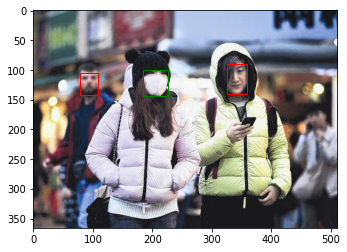

In [25]:
only_totensor = transforms.Compose([transforms.ToTensor()])

torchvision_dataset_no_transform = TorchvisionMaskDataset(
    path = 'data/Mask_data/images/',
    transform = only_totensor
)

img, annot, transform_time = torchvision_dataset_no_transform[0]
print('transforms 적용 전')
plot_image_from_output(img, annot) 

transforms 적용 후


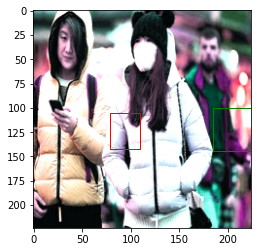

In [26]:
img, annot, transform_time = torchvision_dataset[0]

print('transforms 적용 후')
plot_image_from_output(img, annot)

변경 전에 비해 변경 후 이미지는 앞서 언급한 변화들이 적용된 것을 볼 수 있습니다. 또한 이미지 자체적인 변화는 이뤄졌지만 바운딩 박스는 변화된 이미지에서 위치가 어긋난 것을 확인할 수 있습니다. torchvision.transform에서 제공하는 augmentation은 이미지 값에 대한 augmentation만 진행이 되며, 바운딩 박스는 같이 변환되지 않는 것을 알 수 있습니다.

이미지 분류 문제에서는 이미지가 변해도 라벨값이 고정이지만, 객체 검출 문제에서는 이미지가 변함에 따라 라벨 값 또한 함께 변해야 합니다.

In [27]:
total_time = 0
for i in range(100):
  sample, _, transform_time = torchvision_dataset[0]
  total_time += transform_time

print("torchvision time: {} ms".format(total_time*10))

torchvision time: 4.736936092376709 ms


###  Albumentations

In [28]:
class AlbumentationsDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)

        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("data/Mask_data/annotations/", file_label)
        
        # Read an image with OpenCV
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        target = generate_target(label_path)

        start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image)
            total_time = (time.time() - start_t)
            image = augmented['image']
        
            
        return image, target, total_time

In [30]:
# Same transform with torchvision_transform
albumentations_transform = albumentations.Compose([
    albumentations.Resize(300, 300), 
    albumentations.RandomCrop(224, 224),
    albumentations.ColorJitter(p=1), 
    albumentations.HorizontalFlip(p=1), 
    albumentations.pytorch.transforms.ToTensorV2()
])

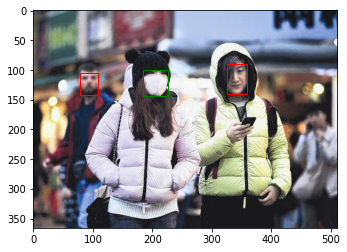

In [31]:
# 변경 전
img, annot, transform_time = torchvision_dataset_no_transform[0]
plot_image_from_output(img, annot)

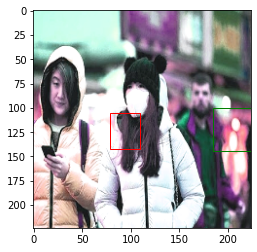

In [34]:
# 변경 후
albumentation_dataset = AlbumentationsDataset(
    path = 'data/Mask_data/images/',
    transform = albumentations_transform
)

img, annot, transform_time = albumentation_dataset[0]
plot_image_from_output(img, annot)


torchvision.transforms과 마찬가지로 이미지 변환이 이루어 졌지만, 바운딩 박스는 변하지 않은 것을 알 수 있습니다. 

In [35]:
total_time = 0
for i in range(100):
    sample, _, transform_time = albumentation_dataset[0]
    total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

albumentations time/sample: 1.1696720123291016 ms


### 확률 기반 Augmentation 

Albmentations는 torchvision.transforms 보다 속도가 빠를 뿐만 아니라 새로운 기능 또한 제공합니다. 이번 절에서는 Albumentations에서 제공하는 OneOf 함수에 대해 알아보겠습니다. 이 함수는 list 안에 있는 augmentation 기능 들을 주어진 확률 값에 기반하여 가져옵니다. list 값 자체의 확률 값과 더불어 해당 함수의 확률 값을 함께 고려하여 실행 여부를 결정합니다. 



In [36]:
albumentations_transform_oneof = albumentations.Compose([
    albumentations.Resize(300, 300), 
    albumentations.RandomCrop(224, 224),
    albumentations.OneOf([
                          albumentations.HorizontalFlip(p=1),
                          albumentations.RandomRotate90(p=1),
                          albumentations.VerticalFlip(p=1)            
    ], p=1),
    albumentations.OneOf([
                          albumentations.MotionBlur(p=1),
                          albumentations.OpticalDistortion(p=1),
                          albumentations.GaussNoise(p=1)                 
    ], p=1),
    albumentations.pytorch.ToTensorV2()
])

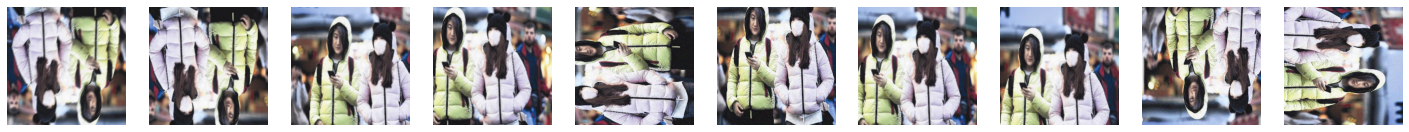

In [37]:
albumentation_dataset_oneof = AlbumentationsDataset(
    path = 'data/Mask_data/images/',
    transform = albumentations_transform_oneof
)

num_samples = 10
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
  ax[i].imshow(transforms.ToPILImage()(albumentation_dataset_oneof[0][0]))
  ax[i].axis('off')

### 바운딩 박스 Augmentation

객체 탐지 모델 구축에 사용되는 이미지에 대한 augmentation 진행 시, 이미지 변환 뿐만 아니라 그에 따른 바운딩 박스 변환 또한 함께 진행해주어야 합니다.  

 Albumentations에서 제공하는 Compose 함수에 있는 bbox_params 파라미터를 활용하면 바운딩 박스 augmentation이 가능합니다.



In [42]:
class BboxAugmentationDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)

        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("data/Mask_data/annotations/", file_label)
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        target = generate_target(label_path)

        if self.transform:
            transformed = self.transform(image = image, bboxes = target['boxes'], labels = target['labels'])
            image = transformed['image']
            target = {'boxes':transformed['bboxes'], 'labels':transformed['labels']}
        
            
        return image, target

 albumentations.Compose 함수를 활용해 변환을 정의해보겠습니다. 가장 먼저 좌우반전을 실시할 것이며, 그 이후에 -90도에서 90도 사이의 회전을 진행하겠습니다. 바운딩 박스도 함께 변환을 진행해주기 위해 bbox_params 파라미터에 albumentations.BboxParams 객체를 입력해줍니다. Face Mask Detection 데이터셋은 바운딩 박스 표기법이 xmin, ymin, xmax, ymax으로 돼 있고, 이것은 pascal_voc 표기법과 같습니다. 그러므로 format 파라미터에 pascal_voc을 입력합니다. 또한 transform 진행 시 객체별 클래스 값은 labels 파라미터에 저장해두기 위해 label_field에 labels를 입력합니다.

In [39]:
bbox_transform = albumentations.Compose(
    [albumentations.HorizontalFlip(p=1),
     albumentations.Rotate(p=1),
     albumentations.pytorch.transforms.ToTensorV2()],
    bbox_params=albumentations.BboxParams(format='pascal_voc', label_fields=['labels']),
)

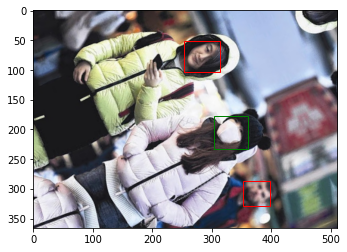

In [43]:
bbox_transform_dataset = BboxAugmentationDataset(
    path = 'data/Mask_data/images/',
    transform = bbox_transform
)

img, annot = bbox_transform_dataset[0]
plot_image_from_output(img, annot)


### 데이터 분리

In [45]:
print(len(os.listdir('data/Mask_data/annotations')))
print(len(os.listdir('data/Mask_data/images')))

853
853


전체 데이터셋 개수가 적으므로 8:2 비율을 가져가 보도록 하겠습니다. 853개의 데이터 중 170개를 시험 데이터로 사용하기 위해 해당 데이터를 별도의 폴더로 옮겨 주도록 하겠습니다. 우선 리눅스 명령어 mkdir를 활용하여 시험 데이터를 담을 폴더를 생성합니다.

In [47]:
! mkdir test_images
! mkdir test_annotations

In [48]:
import random
random.seed(1234)
idx = random.sample(range(853), 170)
print(len(idx))
print(idx[:10])

170
[796, 451, 119, 7, 92, 826, 596, 35, 687, 709]


In [50]:
import shutil

for img in np.array(sorted(os.listdir('data/Mask_data/images')))[idx]:
    shutil.move('data/Mask_data/images/'+img, 'test_images/'+img)

for annot in np.array(sorted(os.listdir('data/Mask_data/annotations')))[idx]:
    shutil.move('data/Mask_data/annotations/'+annot, 'test_annotations/'+annot)

In [51]:
print(len(os.listdir('data/Mask_data/annotations')))
print(len(os.listdir('data/Mask_data/images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

683
683
170
170


이미지 분류 문제에서는 훈련용 시험용 데이터를 나눈 후 이미지 개수만 확인하면 되겠지만, 객체 탐지 문제에서는 각 클래스 별로 몇 개의 객체가 데이터셋 내부에 존재하는지 확인하는 작업이 필요합니다. 

In [52]:
from tqdm import tqdm
from collections import Counter

def get_num_objects_for_each_class(dataset):

    total_labels = []

    for img, annot in tqdm(dataset, position = 0, leave = True):
        total_labels += [int(i) for i in annot['labels']]

    return Counter(total_labels)


train_data =  BboxAugmentationDataset(
    path = 'data/Mask_data/images/'
)

test_data =  BboxAugmentationDataset(
    path = 'test_images/'
)

train_objects = get_num_objects_for_each_class(train_data)
test_objects = get_num_objects_for_each_class(test_data)

print('\n train 데이터에 있는 객체', train_objects)
print('\n test 데이터에 있는 객체', test_objects)

100%|██████████| 170/170 [00:02<00:00, 82.04it/s]


 train 데이터에 있는 객체 Counter({1: 2691, 0: 532, 2: 97})

 test 데이터에 있는 객체 Counter({1: 541, 0: 185, 2: 26})


get_num_objects_for_each_class는 데이터셋에 있는 모든 바운딩 박스의 라벨 값을 total_labels에 저장 후 Counter 클래스를 활용해 라벨별 개수를 세어 반환하는 함수입니다. 학습용 데이터에는 532개의 0번 클래스, 2,691개의 1번 클래스, 97개의 2번 클래스가 위치해 있으며 시험용 데이터에는 185개의 0번 클래스, 541개의 1번 클래스, 26개의 2번 클래스가 위치해 있습니다. 데이터셋별로 0,1,2 비율이 유사한 것을 보아 적절히 데이터가 나뉘어 진 것을 확인할 수 있습니다.

